In [1]:
import requests
import time
from bs4 import BeautifulSoup
#设置列表页URL的固定部分
url='http://bj.lianjia.com/ershoufang/'
#设置页面页的可变部分
page=('pg')
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
'Accept':'text/html;q=0.9,*/*;q=0.8',
'Accept-Charset':'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
'Accept-Encoding':'gzip',
'Connection':'close',
'Referer':'http://www.baidu.com/link?url=_andhfsjjjKRgEWkj7i9cFmYYGsisrnm2A-TN3XZDQXxvGsM9k9ZZSnikW2Yds4s&wd=&eqid=c3435a7d00006bd600000003582bfd1f'
}
for i in range(1,100):
     if i == 1:
          i=str(i)
          a=(url+page+i+'/')
          r=requests.get(url=a,headers=headers)
          html=r.content
     else:
          i=str(i)
          a=(url+page+i+'/')
          r=requests.get(url=a,headers=headers)
          html2=r.content
          html = html + html2
     #每次间隔0.5秒
     time.sleep(0.5)
lj=BeautifulSoup(html,'html.parser')
price=lj.find_all('div',attrs={'class':'priceInfo'})
tp=[]
for a in price:
    totalPrice=a.span.string
    tp.append(totalPrice)
houseInfo=lj.find_all('div',attrs={'class':'houseInfo'})
hi=[]
for b in houseInfo:
    house=b.get_text()
    hi.append(house)
followInfo=lj.find_all('div',attrs={'class':'followInfo'})
fi=[]
for c in followInfo:
    follow=c.get_text()
    fi.append(follow)
    import pandas as pd
#创建数据表
house=pd.DataFrame({'totalprice':tp,'houseinfo':hi,'followinfo':fi})
#查看数据表的内容
house.head()

,followinfo,houseinfo,totalprice
0,301人关注 / 共50次带看 / 31天以前发布,南湖渠西里 | 2室1厅 | 50.31平米 | 东北 | 简装,335
1,234人关注 / 共34次带看 / 5个月以前发布,一瓶 | 3室2厅 | 115.79平米 | 北 | 简装 | 有电梯,1120
2,107人关注 / 共38次带看 / 14天以前发布,天鸿美域 | 4室2厅 | 156.83平米 | 南 北 | 精装,950
3,149人关注 / 共44次带看 / 6个月以前发布,晶城秀府 | 2室2厅 | 148.38平米 | 东 | 简装 | 有电梯,900
4,110人关注 / 共36次带看 / 7天以前发布,冠英园小区 | 3室1厅 | 90.3平米 | 东 | 简装,926


In [4]:
houseinfo_split=pd.DataFrame((x.split('|')for x in house.houseinfo),index=house.index,
                            columns=['xiaoqu','huxing','mianji','chaoxiang','zhuangxiu',
                                    'dianti','qita'])#分割数据 
houseinfo_split.head()

,xiaoqu,huxing,mianji,chaoxiang,zhuangxiu,dianti,qita
0,南湖渠西里,2室1厅,50.31平米,东北,简装,None,None
1,一瓶,3室2厅,115.79平米,北,简装,有电梯,None
2,天鸿美域,4室2厅,156.83平米,南 北,精装,None,None
3,晶城秀府,2室2厅,148.38平米,东,简装,有电梯,None
4,冠英园小区,3室1厅,90.3平米,东,简装,None,None


In [5]:
house=pd.merge(house,houseinfo_split,right_index=True,left_index=True)#拼接表
house.head()

,followinfo,houseinfo,totalprice,xiaoqu,huxing,mianji,chaoxiang,zhuangxiu,dianti,qita
0,301人关注 / 共50次带看 / 31天以前发布,南湖渠西里 | 2室1厅 | 50.31平米 | 东北 | 简装,335,南湖渠西里,2室1厅,50.31平米,东北,简装,None,None
1,234人关注 / 共34次带看 / 5个月以前发布,一瓶 | 3室2厅 | 115.79平米 | 北 | 简装 | 有电梯,1120,一瓶,3室2厅,115.79平米,北,简装,有电梯,None
2,107人关注 / 共38次带看 / 14天以前发布,天鸿美域 | 4室2厅 | 156.83平米 | 南 北 | 精装,950,天鸿美域,4室2厅,156.83平米,南 北,精装,None,None
3,149人关注 / 共44次带看 / 6个月以前发布,晶城秀府 | 2室2厅 | 148.38平米 | 东 | 简装 | 有电梯,900,晶城秀府,2室2厅,148.38平米,东,简装,有电梯,None
4,110人关注 / 共36次带看 / 7天以前发布,冠英园小区 | 3室1厅 | 90.3平米 | 东 | 简装,926,冠英园小区,3室1厅,90.3平米,东,简装,None,None


In [6]:
followinfo_split=pd.DataFrame((x.split('/') for x in house.followinfo),index=
                             house.index,columns=['guanzhu','daikan','fabu'])
house=pd.merge(house,followinfo_split,right_index=True,left_index=True)


In [7]:
huxing=house.groupby('huxing')['huxing'].agg(len)#按户型列分组并统计数量
huxing

huxing
 1室0厅       39
 1室1厅      243
 1室2厅        7
 2室0厅        4
 2室1厅     1347
 2室2厅      268
 3室0厅        1
 3室1厅      535
 3室2厅      325
 3室3厅        7
 4室1厅       21
 4室2厅      120
 4室3厅        9
 5室1厅        5
 5室2厅       26
 5室3厅        4
 6室1厅        1
 6室2厅        3
 6室4厅        1
 7室2厅        1
 联排别墅        3
Name: huxing, dtype: int64

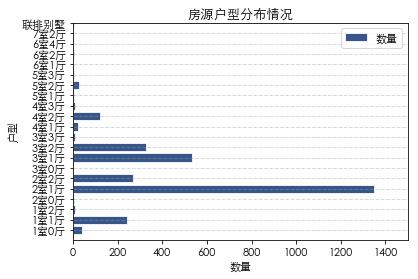

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='STXihei',size=11)
a=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])#户型数量
plt.barh([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],huxing,color='#052B6C',
        alpha=0.8,align='center',edgecolor='white')#横向柱图  bar垂直柱图
plt.ylabel('户型')
plt.xlabel('数量')
plt.xlim(0,1500)
plt.ylim(0,21)
plt.title('房源户型分布情况')
plt.legend(['数量'],loc='upper right')
plt.grid(color='#95a5a6',linestyle='--',linewidth=1,axis='y',alpha=0.4)#网格
plt.yticks(a,('1室0厅','1室1厅','1室2厅','2室0厅','2室1厅','2室2厅','3室0厅',
              '3室1厅','3室2厅','3室3厅','4室1厅','4室2厅','4室3厅','5室1厅',
              '5室2厅','5室3厅', '6室1厅','6室2厅','6室4厅','7室2厅','联排别墅'))
plt.show()

In [62]:
house['mianji'].str.contains('平米')#模糊匹配待续

SyntaxError: unexpected EOF while parsing (<ipython-input-62-2aceb92280ae>, line 2)

In [18]:
mianji_num_split=pd.DataFrame((x.split('平') for x in house.mianji)#对房源面积分割
                             ,index=house.index,columns=['mianji_num','mi'])
house=pd.merge(house,mianji_num_split,right_index=True,left_index=True)

In [65]:
house.drop(house.index[[786,785,1655]],inplace=True)#删除索引为  的行
house[house['mianji_num']=='4室2厅'].head()
house[house['mianji_num']=='3室3厅'].head()

,followinfo,houseinfo,totalprice,xiaoqu,huxing,mianji,chaoxiang,zhuangxiu,dianti,qita,guanzhu,daikan,fabu,mianji_num,mi


In [66]:
#去除mianji_num字段两端的空格
house['mianji_num']=house['mianji_num'].map(str.strip)
#更改mianji_num字段格式为float
house['mianji_num']=house['mianji_num'].astype(float)#数据格式转换
house['mianji_num'].min(),house['mianji_num'].max()

(31.899999999999999, 342.31)

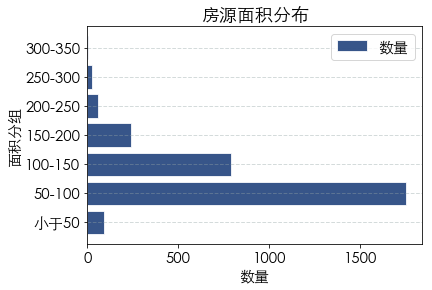

In [71]:
bins=[0,50,100,150,200,250,300,350]
group_mianji=['小于50','50-100','100-150', '150-200','200-250','250-300','300-350']
house['group_manji']=pd.cut(house['mianji_num'],bins,labels=group_mianji)
group_mianji=house.groupby('group_mianji')['group_mianji'].agg(len)
plt.rc('font', family='STXihei', size=15)
a=np.array([1,2,3,4,5,6,7])
plt.barh([1,2,3,4,5,6,7],group_mianji,color='#052B6C',alpha=0.8,
         align='center',edgecolor='white')
plt.ylabel('面积分组')
plt.xlabel('数量')
plt.title('房源面积分布')
plt.legend(['数量'], loc='upper right')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.yticks(a,('小于50', '50-100', '100-150', '150-200','200-250','250-300','300-350'))
plt.show()